1.Exploratory Data Analysis (EDA)

<div style="background-color: #7458dd; padding: 20px; border-radius: 10px; text-align: center; margin: 20px 0;">
    <h1 style=" color: #f363a5;">EDA + Employee Engagement Prediction</h1>
</div>

---

In [281]:
!pip install scikit-learn


## 1. Exploratory Data Analysis (EDA)

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer

In [283]:
df = pd.read_csv("./reporting_fact.csv")

### Initial Data Exploration

In [284]:
df.head()

,userId,courseId,timeSpent,score,discussions,rating,difficulty,comments,interactive,name_x,email,role,department,designation,name_y,est_duration,postedby,stack,prerequisites
0,21,79,185,4,12,NaN,NaN,NaN,NaN,Desiree Castro,dyerhannah@example.com,user,Devops,Intern,Science son seek resource answer.,97,1988-07-31,data engineering,HTML
1,53,232,106,5,0,NaN,NaN,NaN,NaN,Travis Smith,tiffanylee@example.com,user,Devops,Senior Software Engineer,Effort never.,140,2004-11-26,web development,CSS
2,79,51,211,5,31,NaN,NaN,NaN,NaN,Jennifer Glass,gonzalezkelly@example.net,user,Devops,Intern,Step increase.,128,1979-04-11,gen AI,CSS
3,191,227,123,1,12,NaN,NaN,NaN,NaN,Tara Taylor,robertmartin@example.org,user,Full-Stack,Principal Architect,Letter big game investment.,41,2015-12-16,data engineering,Basic SQL
4,200,144,113,5,43,NaN,NaN,NaN,NaN,Leah Townsend,turnermarie@example.net,user,Data Engineering,Solutions Enabler,Be president success field.,38,2021-11-04,data science,CSS


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23559 entries, 0 to 23558
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         23559 non-null  int64  
 1   courseId       23559 non-null  int64  
 2   timeSpent      23559 non-null  int64  
 3   score          23559 non-null  int64  
 4   discussions    23559 non-null  int64  
 5   rating         392 non-null    float64
 6   difficulty     392 non-null    object 
 7   comments       392 non-null    object 
 8   interactive    392 non-null    object 
 9   name_x         23559 non-null  object 
 10  email          23559 non-null  object 
 11  role           23559 non-null  object 
 12  department     23559 non-null  object 
 13  designation    23559 non-null  object 
 14  name_y         23559 non-null  object 
 15  est_duration   23559 non-null  int64  
 16  postedby       23559 non-null  object 
 17  stack          23559 non-null  object 
 18  prereq

In [286]:
df.describe()

,userId,courseId,timeSpent,score,discussions,rating,est_duration
count,23559.000000,23559.000000,23559.000000,23559.000000,23559.000000,392.000000,23559.000000
mean,100.471709,149.856530,119.795959,2.497262,25.175517,2.910714,125.340295
std,57.714736,86.468032,69.198201,1.711410,14.666785,1.362519,68.663605
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,51.000000,75.000000,60.000000,1.000000,13.000000,2.000000,63.000000
50%,100.000000,150.000000,119.000000,2.000000,25.000000,3.000000,124.000000
75%,150.000000,225.000000,179.000000,4.000000,38.000000,4.000000,184.000000
max,200.000000,300.000000,240.000000,5.000000,50.000000,5.000000,239.000000


In [287]:
df.isnull().sum()

userId               0
courseId             0
timeSpent            0
score                0
discussions          0
rating           23167
difficulty       23167
comments         23167
interactive      23167
name_x               0
email                0
role                 0
department           0
designation          0
name_y               0
est_duration         0
postedby             0
stack                0
prerequisites     4455
dtype: int64

<Figure size 1500x1000 with 0 Axes>

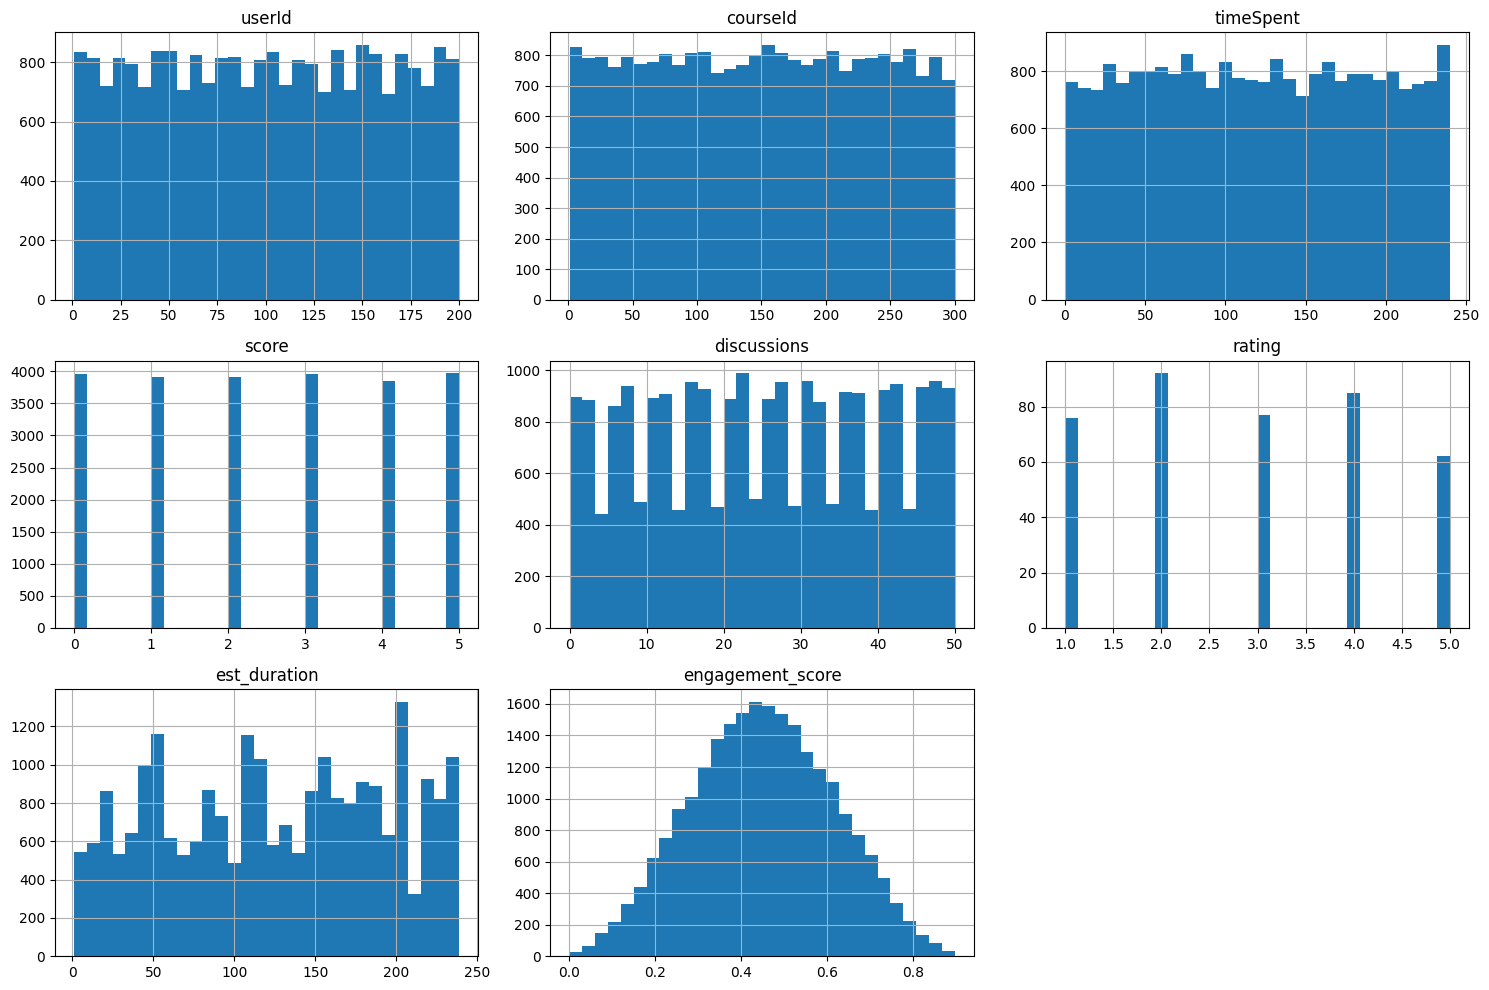

In [293]:
plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

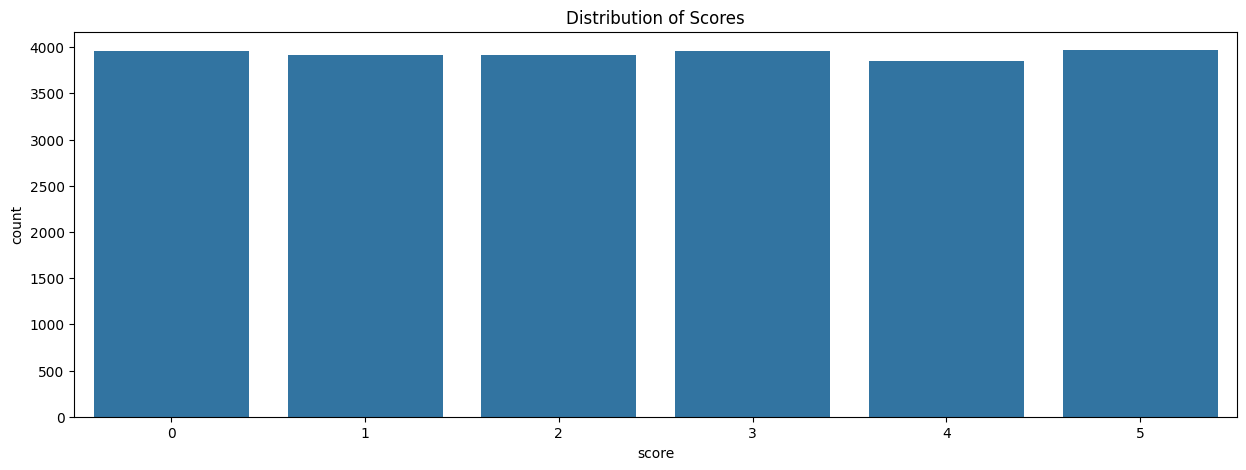

In [360]:
# Bar plots for categorical variables
plt.figure(figsize=(15, 5))
sns.countplot(x='score', data=df)
plt.title('Distribution of Scores')
plt.show()

Text(0.5, 1.0, 'Distribution of Time Spent')

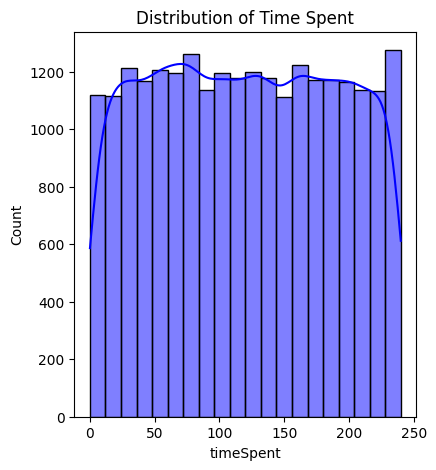

In [361]:
plt.figure(figsize=(15, 5))

# Time Spent Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['timeSpent'], kde=True, bins=20, color='blue')
plt.title('Distribution of Time Spent')


C:\Users\LalithKishoreP\AppData\Local\Temp\ipykernel_8460\1534229541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='department', palette='Set2')


Text(0.5, 1.0, 'Department Distribution')

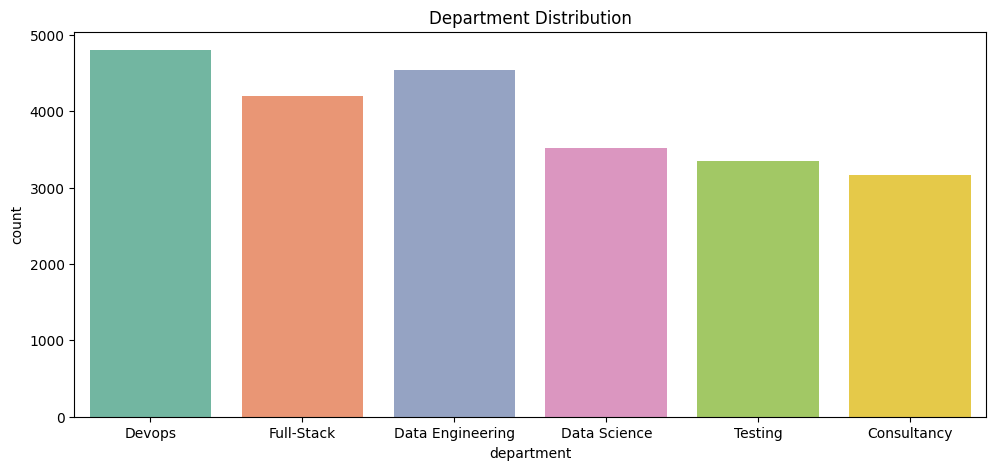

In [364]:
plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='department', palette='Set2')
plt.title('Department Distribution')

C:\Users\LalithKishoreP\AppData\Local\Temp\ipykernel_8460\2252688283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='designation', palette='Set3')


Text(0.5, 1.0, 'Designation Distribution')

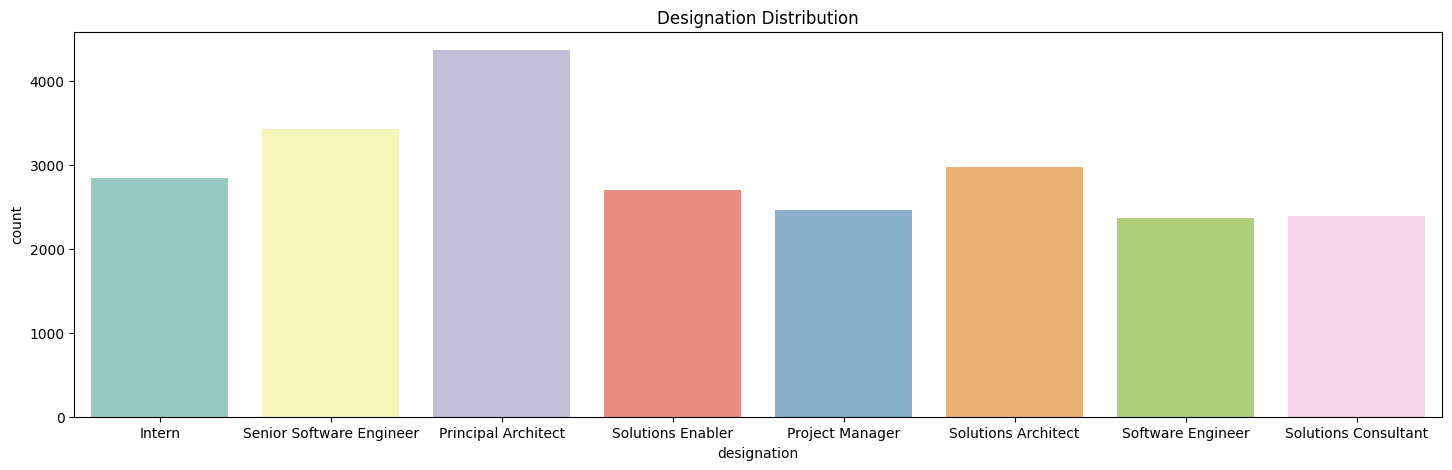

In [368]:
plt.figure(figsize=(60, 5))
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='designation', palette='Set3')
plt.title('Designation Distribution')

Text(0.5, 1.0, 'Distribution of Discussions')

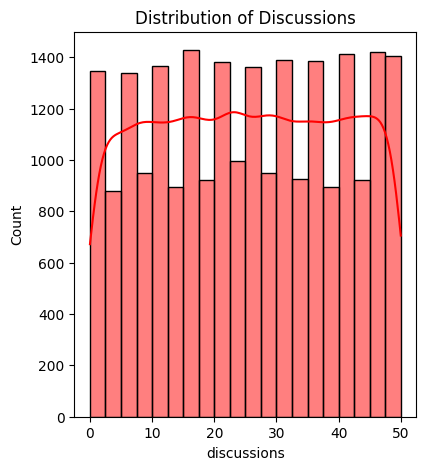

In [370]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
sns.histplot(df['discussions'], kde=True, bins=20, color='red')
plt.title('Distribution of Discussions')

In [288]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                userId  courseId  timeSpent     score  discussions    rating  \
userId        1.000000 -0.000052  -0.002526  0.004395    -0.000587  0.035465   
courseId     -0.000052  1.000000   0.000364 -0.009030     0.001881 -0.093689   
timeSpent    -0.002526  0.000364   1.000000  0.005647    -0.002918  0.024873   
score         0.004395 -0.009030   0.005647  1.000000    -0.004590 -0.064950   
discussions  -0.000587  0.001881  -0.002918 -0.004590     1.000000  0.018638   
rating        0.035465 -0.093689   0.024873 -0.064950     0.018638  1.000000   
est_duration  0.000212  0.066907  -0.002754  0.001001    -0.009632  0.054942   

              est_duration  
userId            0.000212  
courseId          0.066907  
timeSpent        -0.002754  
score             0.001001  
discussions      -0.009632  
rating            0.054942  
est_duration      1.000000  


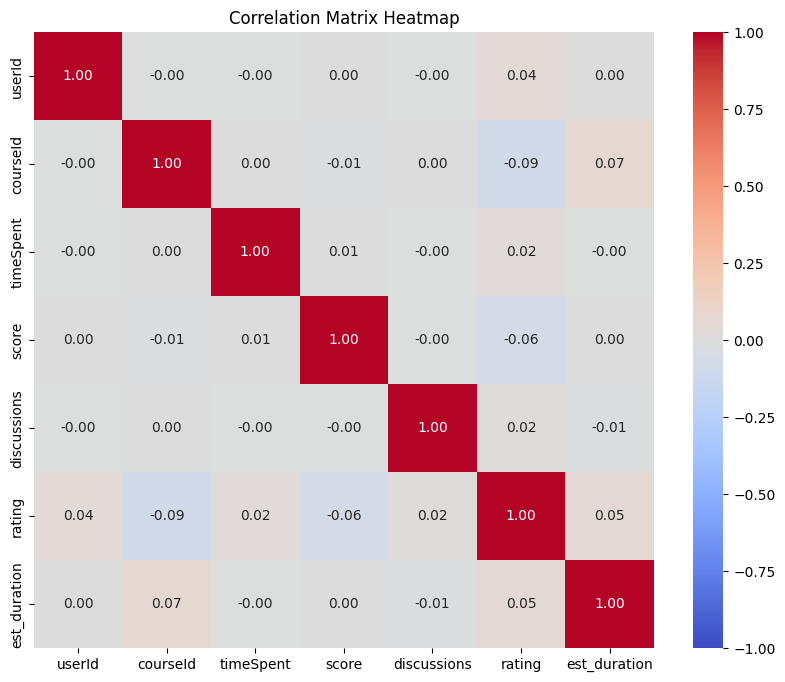

In [289]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


### 2. Feature Engineering

In [290]:
max_time_spent = df['timeSpent'].max()
max_score = df['score'].max()
max_discussions = df['discussions'].max()

df['engagement_score'] = (0.4 * (df['timeSpent'] / max_time_spent)) + (0.3 * (df['score'] / max_score)) + (0.2 * (df['discussions'] / max_discussions)) 

In [291]:
# Define thresholds to categorize engagement score
def categorize_engagement(score):
    if score >= 0.7:  # Threshold for Good
        return 'Good'
    elif 0.4 <= score < 0.7:  # Threshold for Average
        return 'Average'
    else:
        return 'Bad'

# Apply the function to create a label for the engagement score
df['engagement_label'] = df['engagement_score'].apply(categorize_engagement)

In [292]:
df.head()

,userId,courseId,timeSpent,score,discussions,rating,difficulty,comments,interactive,name_x,...,role,department,designation,name_y,est_duration,postedby,stack,prerequisites,engagement_score,engagement_label
0,21,79,185,4,12,NaN,NaN,NaN,NaN,Desiree Castro,...,user,Devops,Intern,Science son seek resource answer.,97,1988-07-31,data engineering,HTML,0.596333,Average
1,53,232,106,5,0,NaN,NaN,NaN,NaN,Travis Smith,...,user,Devops,Senior Software Engineer,Effort never.,140,2004-11-26,web development,CSS,0.476667,Average
2,79,51,211,5,31,NaN,NaN,NaN,NaN,Jennifer Glass,...,user,Devops,Intern,Step increase.,128,1979-04-11,gen AI,CSS,0.775667,Good
3,191,227,123,1,12,NaN,NaN,NaN,NaN,Tara Taylor,...,user,Full-Stack,Principal Architect,Letter big game investment.,41,2015-12-16,data engineering,Basic SQL,0.313000,Bad
4,200,144,113,5,43,NaN,NaN,NaN,NaN,Leah Townsend,...,user,Data Engineering,Solutions Enabler,Be president success field.,38,2021-11-04,data science,CSS,0.660333,Average


In [295]:
df.columns

Index(['userId', 'courseId', 'timeSpent', 'score', 'discussions', 'rating',
       'difficulty', 'comments', 'interactive', 'name_x', 'email', 'role',
       'department', 'designation', 'name_y', 'est_duration', 'postedby',
       'stack', 'prerequisites', 'engagement_score', 'engagement_label'],
      dtype='object')

In [296]:
df = df.drop(columns=['userId', 'courseId','rating','difficulty','comments','interactive','name_x','email','role','name_y','est_duration','postedby','stack','prerequisites'])

In [297]:
df.columns

Index(['timeSpent', 'score', 'discussions', 'department', 'designation',
       'engagement_score', 'engagement_label'],
      dtype='object')

In [298]:
df['engagement_label'].value_counts()

engagement_label
Average    12727
Bad         9152
Good        1680
Name: count, dtype: int64

### Encoding Categorical Variables

In [299]:
df_encoded = pd.get_dummies(df, columns=['department', 'designation'], drop_first=True)
df_encoded.head()

,timeSpent,score,discussions,engagement_score,engagement_label,department_Data Engineering,department_Data Science,department_Devops,department_Full-Stack,department_Testing,designation_Principal Architect,designation_Project Manager,designation_Senior Software Engineer,designation_Software Engineer,designation_Solutions Architect,designation_Solutions Consultant,designation_Solutions Enabler
0,185,4,12,0.596333,Average,False,False,True,False,False,False,False,False,False,False,False,False
1,106,5,0,0.476667,Average,False,False,True,False,False,False,False,True,False,False,False,False
2,211,5,31,0.775667,Good,False,False,True,False,False,False,False,False,False,False,False,False
3,123,1,12,0.313000,Bad,False,False,False,True,False,True,False,False,False,False,False,False
4,113,5,43,0.660333,Average,True,False,False,False,False,False,False,False,False,False,False,True


In [300]:
X = df_encoded.drop(columns=['engagement_score','engagement_label'])   # Features
y = df_encoded['engagement_label']  # Target
label_mapping = {
    'Good': 2,
    'Average': 1,
    'Bad': 0
}
y = y.map(label_mapping)

In [301]:
df_encoded.isnull().sum()

timeSpent                               0
score                                   0
discussions                             0
engagement_score                        0
engagement_label                        0
department_Data Engineering             0
department_Data Science                 0
department_Devops                       0
department_Full-Stack                   0
department_Testing                      0
designation_Principal Architect         0
designation_Project Manager             0
designation_Senior Software Engineer    0
designation_Software Engineer           0
designation_Solutions Architect         0
designation_Solutions Consultant        0
designation_Solutions Enabler           0
dtype: int64

In [302]:
y.dropna(inplace=True)

In [372]:
df_encoded.head()

,timeSpent,score,discussions,engagement_score,engagement_label,department_Data Engineering,department_Data Science,department_Devops,department_Full-Stack,department_Testing,designation_Principal Architect,designation_Project Manager,designation_Senior Software Engineer,designation_Software Engineer,designation_Solutions Architect,designation_Solutions Consultant,designation_Solutions Enabler
0,185,4,12,0.596333,Average,False,False,True,False,False,False,False,False,False,False,False,False
1,106,5,0,0.476667,Average,False,False,True,False,False,False,False,True,False,False,False,False
2,211,5,31,0.775667,Good,False,False,True,False,False,False,False,False,False,False,False,False
3,123,1,12,0.313000,Bad,False,False,False,True,False,True,False,False,False,False,False,False
4,113,5,43,0.660333,Average,True,False,False,False,False,False,False,False,False,False,False,True


In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: xlabel='engagement_label', ylabel='count'>

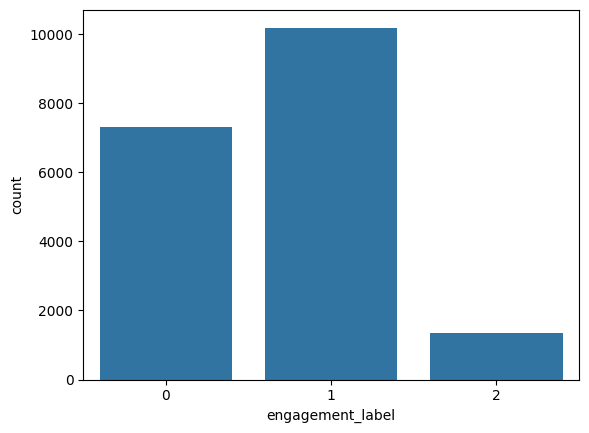

In [375]:
sns.countplot(data=df_encoded,x=y_train)

### Balancing the Training Data

In [306]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: xlabel='engagement_label', ylabel='count'>

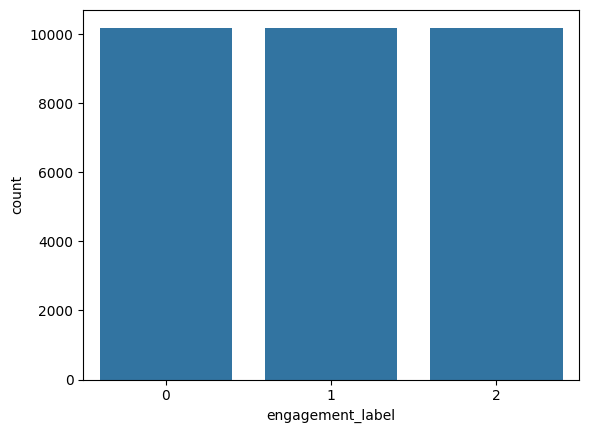

In [376]:
sns.countplot(data=df_encoded,x=y_train_resampled)

In [307]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [308]:
y_pred = model.predict(X_test)


In [318]:
X_test.head(1)

,timeSpent,score,discussions,department_Data Engineering,department_Data Science,department_Devops,department_Full-Stack,department_Testing,designation_Principal Architect,designation_Project Manager,designation_Senior Software Engineer,designation_Software Engineer,designation_Solutions Architect,designation_Solutions Consultant,designation_Solutions Enabler
19269,72,0,39,False,False,False,True,False,False,False,True,False,False,False,False


In [373]:
y_pred_proba = model.predict_proba(X_test)

In [310]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))  # Detailed classification report

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # Use 'ovr' for multi-class
print("ROC AUC Score:", roc_auc)


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1835
           1       0.96      0.97      0.97      2538
           2       0.93      0.92      0.92       339

    accuracy                           0.96      4712
   macro avg       0.95      0.95      0.95      4712
weighted avg       0.96      0.96      0.96      4712

ROC AUC Score: 0.9970006220451336


Feature Importances:


C:\Users\LalithKishoreP\AppData\Local\Temp\ipykernel_8460\2937786035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[X.columns[i] for i in indices], y=feature_importances[indices], palette='Set2')


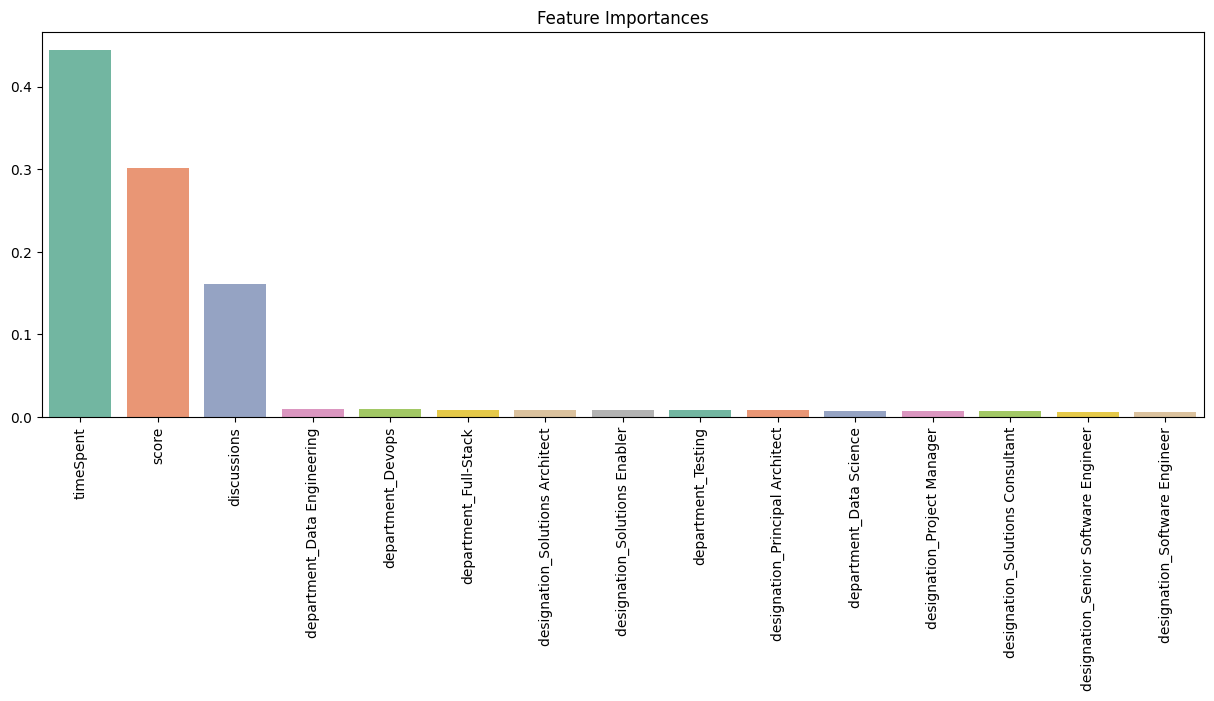

In [374]:
print("Feature Importances:")
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(15, 5))
sns.barplot(x=[X.columns[i] for i in indices], y=feature_importances[indices], palette='Set2')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

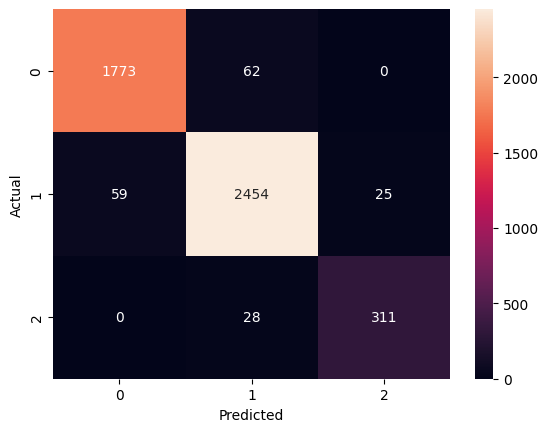

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [357]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
print(f'Cross-validation scores: {cv_scores}')


Cross-validation scores: [0.92378149 0.97873732 0.97955177 0.98462293 0.98249632]


In [336]:
feature_names = X_test.columns
feature_names

Index(['timeSpent', 'score', 'discussions', 'department_Data Engineering',
       'department_Data Science', 'department_Devops', 'department_Full-Stack',
       'department_Testing', 'designation_Principal Architect',
       'designation_Project Manager', 'designation_Senior Software Engineer',
       'designation_Software Engineer', 'designation_Solutions Architect',
       'designation_Solutions Consultant', 'designation_Solutions Enabler'],
      dtype='object')

In [341]:
input_data = pd.DataFrame([[200, 5, 100, False, False, False, True, False, False, False, True, False, False, False, False]], 
                          columns=feature_names)

# Make prediction
prediction = model.predict(input_data)
print(prediction)

[2]


In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [354]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)  # Your existing model
}

In [356]:
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print("ROC AUC Score:", roc_auc)
    
    print(classification_report(y_test, y_pred))
    print("-" * 50)


c:\Users\LalithKishoreP\Desktop\final data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9923599320882852
ROC AUC Score: 0.9996606138835175
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1835
           1       1.00      0.99      0.99      2538
           2       0.93      0.99      0.96       339

    accuracy                           0.99      4712
   macro avg       0.98      0.99      0.98      4712
weighted avg       0.99      0.99      0.99      4712

--------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.8597198641765704
ROC AUC Score: 0.9866676855021609
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1835
           1       0.95      0.78      0.86      2538
           2       0.51      1.00      0.68       339

    accuracy                           0.86      4712
   macro avg       0.78      0.91      0.81      4712
weighted avg       0.89      0.86      0.87      4712

----